In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_labels[19]

1

In [ ]:
max([max(sequence) for sequence in train_data])


9999

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[19]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorizing the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5369 - binary_accuracy: 0.7812 - val_loss: 0.4083 - val_binary_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3349 - binary_accuracy: 0.8922 - val_loss: 0.3183 - val_binary_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2500 - binary_accuracy: 0.9187 - val_loss: 0.3395 - val_binary_accuracy: 0.8586
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1991 - binary_accuracy: 0.9346 - val_loss: 0.3056 - val_binary_accuracy: 0.8742
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1668 - binary_accuracy: 0.9471 - val_loss: 0.2912 - val_binary_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1398 - binary_accuracy: 0.9556 - val_loss: 0.2823 - val_binary_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

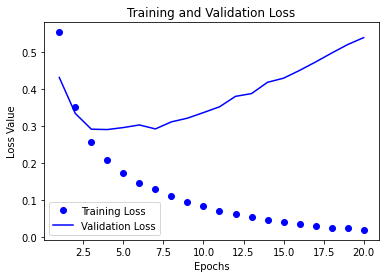

In [ ]:
import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

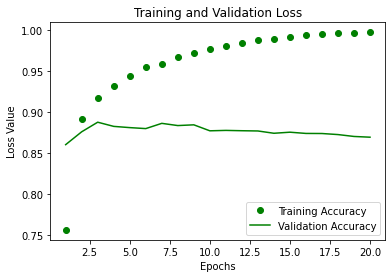

In [ ]:
Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label = "Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label = "Validation Accuracy")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

In [ ]:
Val_Acc_Values

[0.8598999977111816,
 0.8755999803543091,
 0.8873000144958496,
 0.8822000026702881,
 0.8806999921798706,
 0.8794999718666077,
 0.8859000205993652,
 0.8831999897956848,
 0.8841000199317932,
 0.876800000667572,
 0.8773000240325928,
 0.8769000172615051,
 0.8766000270843506,
 0.8737999796867371,
 0.8751000165939331,
 0.8736000061035156,
 0.8734999895095825,
 0.8722000122070312,
 0.8698999881744385,
 0.8690000176429749]

We can see that the validation accuracy (Val_Acc_Values = 0.8894 at 3 epochs) of this model increaces up until the 3rd epoch then dips but then comes back up. Going to make a model that is 3 epochs to see the accuracy

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 33ms/step - loss: 0.4728 - accuracy: 0.8082
Epoch 2/3
49/49 [==============================] - 2s 35ms/step - loss: 0.2816 - accuracy: 0.9037
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.8872


I will now use the 3 hidden layer method to create a model.

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.5454 - binary_accuracy: 0.7703 - val_loss: 0.4317 - val_binary_accuracy: 0.8413
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.3252 - binary_accuracy: 0.8933 - val_loss: 0.3066 - val_binary_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2304 - binary_accuracy: 0.9215 - val_loss: 0.3069 - val_binary_accuracy: 0.8750
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1813 - binary_accuracy: 0.9405 - val_loss: 0.3111 - val_binary_accuracy: 0.8761
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1448 - binary_accuracy: 0.9533 - val_loss: 0.2885 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1268 - binary_accuracy: 0.9581 - val_loss: 0.3064 - val_binary_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - los

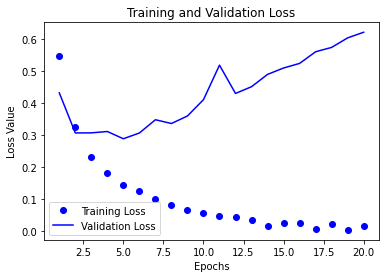

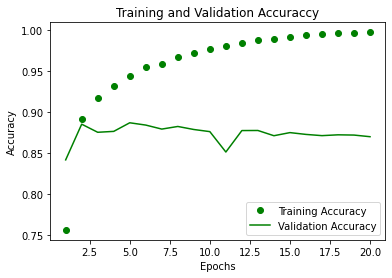

Epoch 1/3
49/49 [==============================] - 2s 34ms/step - loss: 0.4680 - accuracy: 0.8072
Epoch 2/3
49/49 [==============================] - 2s 33ms/step - loss: 0.2703 - accuracy: 0.9032
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3040 - accuracy: 0.8778


[0.30400627851486206, 0.877839982509613]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

WRITE RESULTS FOR THE 3 HIDDEN LAYER TEST

HIDDEN 1 LAYER TEST

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5030 - binary_accuracy: 0.7907 - val_loss: 0.3939 - val_binary_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.3247 - binary_accuracy: 0.8981 - val_loss: 0.3211 - val_binary_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 2s 69ms/step - loss: 0.2568 - binary_accuracy: 0.9178 - val_loss: 0.2967 - val_binary_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2158 - binary_accuracy: 0.9304 - val_loss: 0.3310 - val_binary_accuracy: 0.8610
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1888 - binary_accuracy: 0.9408 - val_loss: 0.2740 - val_binary_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1660 - binary_accuracy: 0.9481 - val_loss: 0.2822 - val_binary_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - los

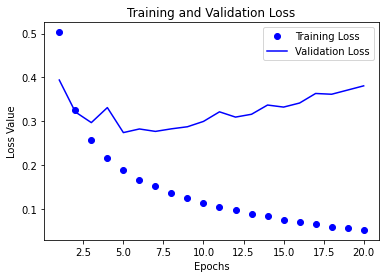

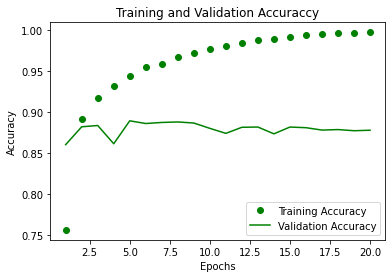

Epoch 1/3
49/49 [==============================] - 3s 32ms/step - loss: 0.4869 - accuracy: 0.7984
Epoch 2/3
49/49 [==============================] - 2s 34ms/step - loss: 0.2670 - accuracy: 0.9042
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.3143 - accuracy: 0.8744


[0.31428030133247375, 0.8743600249290466]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'go', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'g', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test 32 hidden neurons in 2 hidden layers

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5172 - binary_accuracy: 0.7691 - val_loss: 0.3706 - val_binary_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3059 - binary_accuracy: 0.8931 - val_loss: 0.3071 - val_binary_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2259 - binary_accuracy: 0.9211 - val_loss: 0.3343 - val_binary_accuracy: 0.8617
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1865 - binary_accuracy: 0.9343 - val_loss: 0.3206 - val_binary_accuracy: 0.8722
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1525 - binary_accuracy: 0.9467 - val_loss: 0.2959 - val_binary_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1307 - binary_accuracy: 0.9563 - val_loss: 0.3240 - val_binary_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

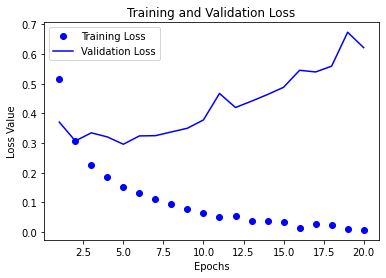

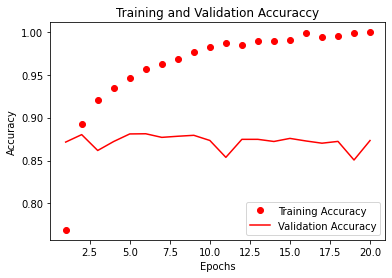

Epoch 1/3
49/49 [==============================] - 1s 19ms/step - loss: 0.4513 - accuracy: 0.8072
Epoch 2/3
49/49 [==============================] - 1s 18ms/step - loss: 0.2646 - accuracy: 0.9031
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2815 - accuracy: 0.8885


[0.28150662779808044, 0.8885200023651123]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'ro', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test the model with 64 neurons with 2 hidden layers.

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5094 - binary_accuracy: 0.7591 - val_loss: 0.3473 - val_binary_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3032 - binary_accuracy: 0.8853 - val_loss: 0.3255 - val_binary_accuracy: 0.8670
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2247 - binary_accuracy: 0.9149 - val_loss: 0.2752 - val_binary_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1806 - binary_accuracy: 0.9341 - val_loss: 0.2854 - val_binary_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1567 - binary_accuracy: 0.9414 - val_loss: 0.3215 - val_binary_accuracy: 0.8793
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1216 - binary_accuracy: 0.9571 - val_loss: 0.5091 - val_binary_accuracy: 0.8288
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

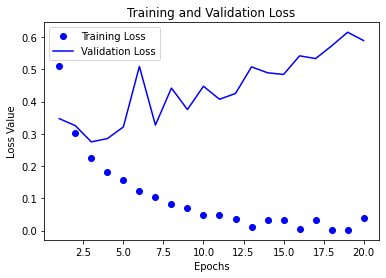

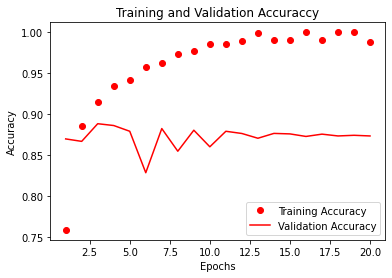

Epoch 1/3
49/49 [==============================] - 2s 26ms/step - loss: 0.4468 - accuracy: 0.8025
Epoch 2/3
49/49 [==============================] - 1s 26ms/step - loss: 0.2640 - accuracy: 0.8982
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.8821


[0.2910822033882141, 0.8821200132369995]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'ro', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test a model with 128 hidden neurons and 2 hidden layers.

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5303 - binary_accuracy: 0.7341 - val_loss: 0.3676 - val_binary_accuracy: 0.8561
Epoch 2/20
30/30 [==============================] - 2s 50ms/step - loss: 0.3017 - binary_accuracy: 0.8819 - val_loss: 0.2981 - val_binary_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2317 - binary_accuracy: 0.9131 - val_loss: 0.3054 - val_binary_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1894 - binary_accuracy: 0.9262 - val_loss: 0.2945 - val_binary_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1335 - binary_accuracy: 0.9518 - val_loss: 0.5038 - val_binary_accuracy: 0.8177
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1095 - binary_accuracy: 0.9592 - val_loss: 0.4564 - val_binary_accuracy: 0.8451
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - los

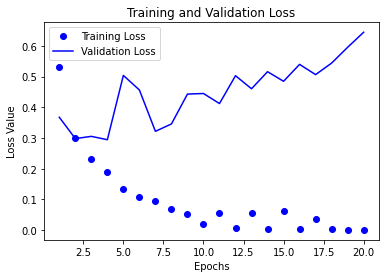

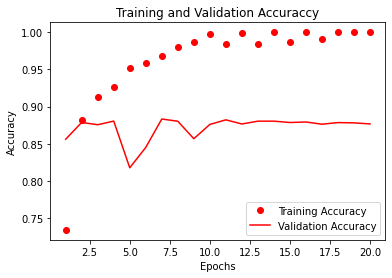

Epoch 1/3
49/49 [==============================] - 3s 39ms/step - loss: 0.4507 - accuracy: 0.7842
Epoch 2/3
49/49 [==============================] - 2s 39ms/step - loss: 0.2698 - accuracy: 0.8924
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.2925 - accuracy: 0.8802


[0.2925280034542084, 0.8801599740982056]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'ro', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

I will now test 8 hidden neurons with 2 hidden layers to see how it affects the model

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5525 - binary_accuracy: 0.7653 - val_loss: 0.4318 - val_binary_accuracy: 0.8593
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3568 - binary_accuracy: 0.8912 - val_loss: 0.3555 - val_binary_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2730 - binary_accuracy: 0.9159 - val_loss: 0.3025 - val_binary_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2235 - binary_accuracy: 0.9299 - val_loss: 0.2845 - val_binary_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1865 - binary_accuracy: 0.9417 - val_loss: 0.2820 - val_binary_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1618 - binary_accuracy: 0.9482 - val_loss: 0.2754 - val_binary_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - los

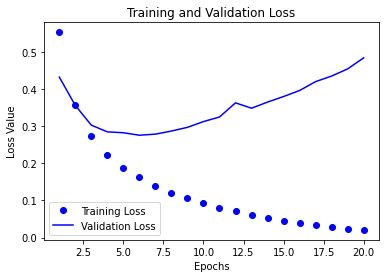

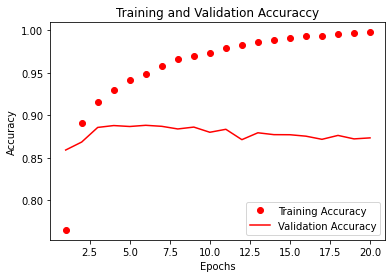

Epoch 1/3
49/49 [==============================] - 1s 14ms/step - loss: 0.5223 - accuracy: 0.8020
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.3223 - accuracy: 0.8953
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2835 - accuracy: 0.8896


[0.2835099697113037, 0.8896399736404419]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'ro', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Part 3 of the assignment - testing the mse loss function instead of the binary crossentropy

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1823 - binary_accuracy: 0.7627 - val_loss: 0.1304 - val_binary_accuracy: 0.8585
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1063 - binary_accuracy: 0.8860 - val_loss: 0.1033 - val_binary_accuracy: 0.8742
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0788 - binary_accuracy: 0.9151 - val_loss: 0.0903 - val_binary_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0643 - binary_accuracy: 0.9275 - val_loss: 0.0863 - val_binary_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0554 - binary_accuracy: 0.9385 - val_loss: 0.0835 - val_binary_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0493 - binary_accuracy: 0.9455 - val_loss: 0.0831 - val_binary_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - los

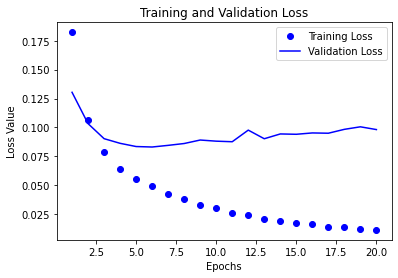

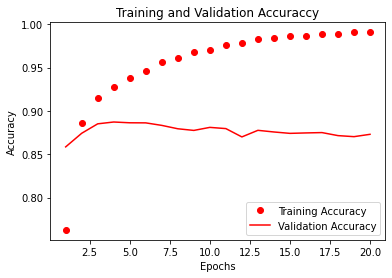

Epoch 1/3
49/49 [==============================] - 1s 19ms/step - loss: 0.1764 - accuracy: 0.7744
Epoch 2/3
49/49 [==============================] - 1s 17ms/step - loss: 0.0959 - accuracy: 0.8939
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.8882


[0.08573915809392929, 0.8882399797439575]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.MSE,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'ro', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Part 4 of the assignment - using the tanh activation instead of relu 

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5216 - binary_accuracy: 0.7854 - val_loss: 0.4021 - val_binary_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 2s 59ms/step - loss: 0.3199 - binary_accuracy: 0.8974 - val_loss: 0.3111 - val_binary_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2374 - binary_accuracy: 0.9185 - val_loss: 0.2756 - val_binary_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1785 - binary_accuracy: 0.9400 - val_loss: 0.2766 - val_binary_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1469 - binary_accuracy: 0.9514 - val_loss: 0.2869 - val_binary_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1153 - binary_accuracy: 0.9625 - val_loss: 0.3057 - val_binary_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 2s 61ms/step - los

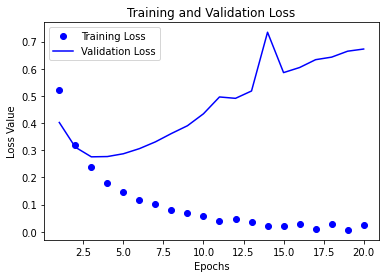

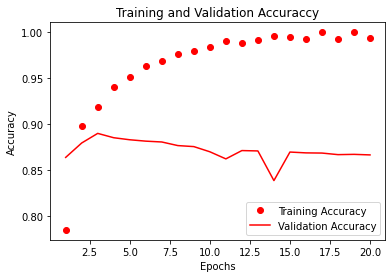

Epoch 1/3
49/49 [==============================] - 1s 15ms/step - loss: 0.4388 - accuracy: 0.8266
Epoch 2/3
49/49 [==============================] - 1s 18ms/step - loss: 0.2565 - accuracy: 0.9064
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.2808 - accuracy: 0.8867


[0.28078657388687134, 0.8867200016975403]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'ro', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Part 5 - I am going to test the dropout method on the model to see its effects

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5676 - binary_accuracy: 0.7524 - val_loss: 0.4644 - val_binary_accuracy: 0.8270
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3751 - binary_accuracy: 0.8847 - val_loss: 0.3491 - val_binary_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2785 - binary_accuracy: 0.9108 - val_loss: 0.3106 - val_binary_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2242 - binary_accuracy: 0.9271 - val_loss: 0.2940 - val_binary_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1881 - binary_accuracy: 0.9391 - val_loss: 0.2783 - val_binary_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1601 - binary_accuracy: 0.9498 - val_loss: 0.2781 - val_binary_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - los

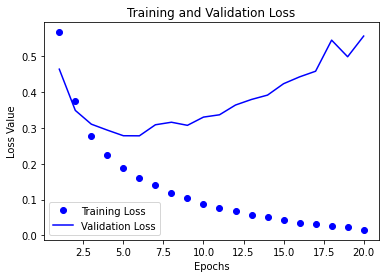

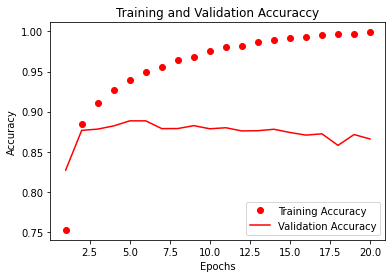

Epoch 1/3
49/49 [==============================] - 1s 17ms/step - loss: 0.4716 - accuracy: 0.8041
Epoch 2/3
49/49 [==============================] - 1s 19ms/step - loss: 0.2746 - accuracy: 0.9050
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2881 - accuracy: 0.8837


[0.28810861706733704, 0.8837199807167053]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(16, activation='relu'))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt

Loss_Values = history_dict['loss']
Val_Loss_Values = history_dict['val_loss']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Loss_Values, 'bo', label="Training Loss")
plt.plot(epochs, Val_Loss_Values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

Acc_Values = history_dict['binary_accuracy']
Val_Acc_Values = history_dict['val_binary_accuracy']

epochs = range(1, len(Loss_Values) + 1)

plt.plot(epochs, Acc_Values, 'ro', label="Training Accuracy")
plt.plot(epochs, Val_Acc_Values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(16, activation='relu'))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results